In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
# Download CIFAR-10 dataset
data_train = datasets.CIFAR10('./datasets/', train=True, download=True, transform=transforms.ToTensor())
data_test = datasets.CIFAR10('./datasets/', train=False, download=True, transform=transforms.ToTensor())

# Instantiate dataloaders
train_loader = DataLoader(data_train, batch_size=64)
test_loader = DataLoader(data_train, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Difine CNN model class

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1, 0)
        self.conv2 = nn.Conv2d(6, 16, 5, 1, 0)
        self.pool = nn.MaxPool2d(2, 2) # Immutable
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = f.relu(self.conv1(x)) #(Batch,3,32,32) => (B,6,28,28)
        x = self.pool(x) #(B,6,28,28) => (B,6,14,14)
        x = f.relu(self.conv2(x)) #(B,6,14,14) => (B,16,10,10)
        x = self.pool(x) #(B,16,10,10) => (B,16,5,5)
        x = x.view(-1, 16*5*5) # (B,16,5,5) => (B,400)
        x = f.relu(self.fc1(x)) #(B,400) => (B,120)
        x = f.relu(self.fc2(x)) #(B,120) => (B,84)
        x = self.fc3(x) #(B,84) => (B,10)
        
        return x


def count_correct(y_pred, y):
    y_pred_np = y_pred.detach().cpu().numpy()
    y_pred_list = [np.argmax(y_pred_np[i]) for i in range(len(y_pred_np))]
    y_list = y.detach().cpu().tolist()
    denom = len(y_list)
    cnt = 0
    
    for y1, y2 in zip(y_pred_list, y_list):
        if y1 == y2:
            cnt += 1

    return cnt, denom

In [ ]:
N_EPOCHS = 150

model = LeNet5()
model = model.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

tr_losses = []
te_losses = []
tr_accs = []
te_accs = []

for epoch in range(N_EPOCHS):
    
    # Training
    model.train()
    tr_epoch_loss = 0
    tr_n_correct = 0
    denom = 0
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x) # (B,3,32,32) => (B,10)
        loss = loss_func(y_pred, y)
        cnt_correct, cnt_all = count_correct(y_pred, y)
        tr_n_correct += cnt_correct
        denom += cnt_all
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tr_epoch_loss += loss.item()
    tr_epoch_loss_avg = tr_epoch_loss / denom
    tr_epoch_acc = tr_n_correct / denom
    tr_losses.append(tr_epoch_loss_avg)
    tr_accs.append(tr_epoch_acc)

    # Testing
    model.eval()
    te_epoch_loss = 0
    te_n_correct = 0
    denom = 0
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        cnt_correct, cnt_all = count_correct(y_pred, y)
        te_n_correct += cnt_correct
        denom += cnt_all
        te_epoch_loss += loss.item()
    te_epoch_loss_avg = te_epoch_loss / denom
    te_epoch_acc = te_n_correct / denom
    te_losses.append(te_epoch_loss_avg)
    te_accs.append(te_epoch_acc)

    # Verbose
    print('epoch: {}, tr_loss: {:.5f}, te_loss: {:.5f}, tr_acc: {:.2f}, te_acc: {:.2f}'.format(epoch, tr_epoch_loss_avg, te_epoch_loss_avg, tr_epoch_acc, te_epoch_acc))

epoch: 0, tr_loss: 0.02813, te_loss: 0.02529, tr_acc: 0.34, te_acc: 0.41
epoch: 1, tr_loss: 0.02343, te_loss: 0.02206, tr_acc: 0.46, te_acc: 0.49
epoch: 2, tr_loss: 0.02170, te_loss: 0.02072, tr_acc: 0.50, te_acc: 0.52
epoch: 3, tr_loss: 0.02049, te_loss: 0.01952, tr_acc: 0.53, te_acc: 0.55
epoch: 4, tr_loss: 0.01956, te_loss: 0.01864, tr_acc: 0.55, te_acc: 0.57
epoch: 5, tr_loss: 0.01879, te_loss: 0.01799, tr_acc: 0.57, te_acc: 0.59
epoch: 6, tr_loss: 0.01815, te_loss: 0.01760, tr_acc: 0.59, te_acc: 0.60
epoch: 7, tr_loss: 0.01759, te_loss: 0.01709, tr_acc: 0.60, te_acc: 0.61
epoch: 8, tr_loss: 0.01705, te_loss: 0.01660, tr_acc: 0.61, te_acc: 0.62
epoch: 9, tr_loss: 0.01658, te_loss: 0.01619, tr_acc: 0.62, te_acc: 0.63
epoch: 10, tr_loss: 0.01618, te_loss: 0.01596, tr_acc: 0.63, te_acc: 0.63
epoch: 11, tr_loss: 0.01583, te_loss: 0.01570, tr_acc: 0.64, te_acc: 0.64
epoch: 12, tr_loss: 0.01549, te_loss: 0.01544, tr_acc: 0.65, te_acc: 0.65
epoch: 13, tr_loss: 0.01524, te_loss: 0.01505, t

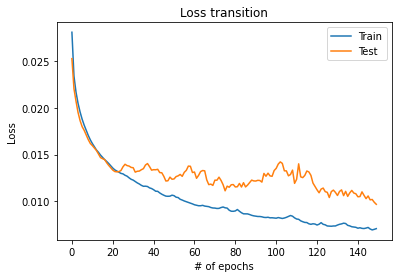

<Figure size 432x288 with 0 Axes>

In [ ]:
x = np.arange(0,N_EPOCHS)
plt.plot(x, tr_losses, label='Train')
plt.plot(x, te_losses, label='Test')
plt.title("Loss transition")
plt.xlabel("# of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

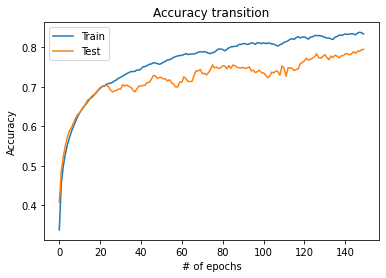

<Figure size 432x288 with 0 Axes>

In [ ]:
x = np.arange(0,N_EPOCHS)
plt.plot(x, tr_accs, label='Train')
plt.plot(x, te_accs, label='Test')
plt.title("Accuracy transition")
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.clf()

In [1]:
#-------------------run-only-in-ipynb-environment-------------------------------

# ※CAUTION※ Save this file before executing the following code!!!
# Generate py from ipynb and save it automatically

if 'get_ipython' in globals():
    import subprocess
    subprocess.run(['jupyter', 'nbconvert', '--to', 'python', '*.ipynb'])
    print('Saved!')
# End of if 'if 'get_ipython' in globals():'

#-------------------run-only-in-ipynb-environment-------------------------------

Saved!
